<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 4
0811033_黃勁瑋_hw04\
2023/10/17


*  Use R, Python, and suitable computer packages to conduct visualization, including Boxplot,
Bar plot, scatter plot, QQ plot, Density plot, pie chart, and histogram….
*  Check weather Simpson's paradox exists in your dataset and explain what you find and why
you choose these visualization methods.
*  Do Visualization with and without outliers and compare the results.
*  Discuss possible problems you plan to investigate for future studies

**Import data and necessary libaries**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-the-global-2000-rankings-2023/forbes_the_global_2000_2023update.csv


In [ ]:
# Load Dataset
df  = pd.read_csv("/kaggle/input/forbes-the-global-2000-rankings-2023/forbes_the_global_2000_2023update.csv")
df.head() #Show the first lines of the dataframe

,rank,company,country,sales,profit,asset,market_value,publish_year
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023


In [ ]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy.stats as stats

**Data Overview**

In [ ]:
df.describe()

,rank,sales,profit,asset,market_value,publish_year
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.0
mean,1000.309500,25422.386000,2208.305500,1.158463e+05,3.699562e+04,2023.0
std,577.395083,46517.168841,6632.030642,3.722422e+05,1.142306e+05,0.0
min,1.000000,-109990.000000,-76170.000000,1.050000e+02,3.200000e+01,2023.0
25%,500.750000,5770.000000,494.850000,1.472000e+04,6.860000e+03,2023.0
50%,1000.500000,12500.000000,961.300000,3.165500e+04,1.531000e+04,2023.0
75%,1499.500000,25170.000000,2202.500000,7.697250e+04,3.404250e+04,2023.0
max,1999.000000,611290.000000,156360.000000,6.116820e+06,2.746210e+06,2023.0


In [ ]:
df['publish_year'].unique()

array([2023])

**Data visualization**

Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


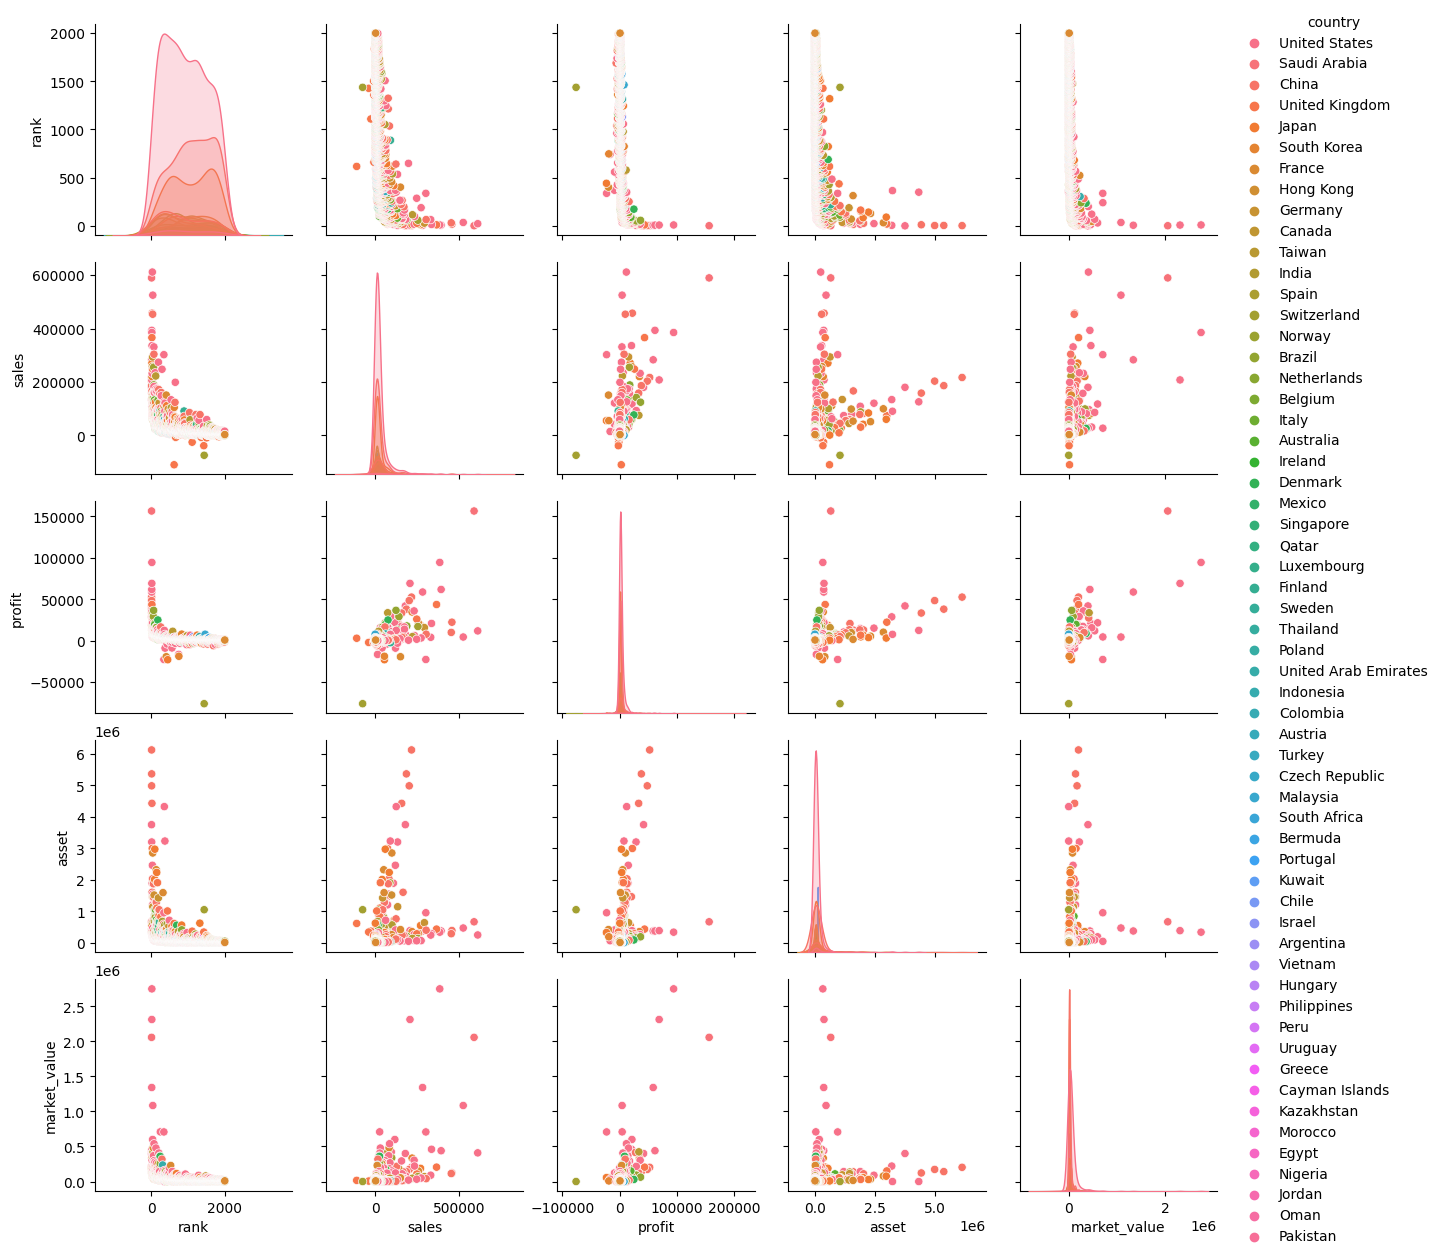

In [ ]:
sns.pairplot(df[['company', 'country','rank', 'sales', 'profit', 'asset', 'market_value']],hue="country")
plt.show()

Barplot: Top 10 Countries by Number of Forbes The Global 2000 Companies

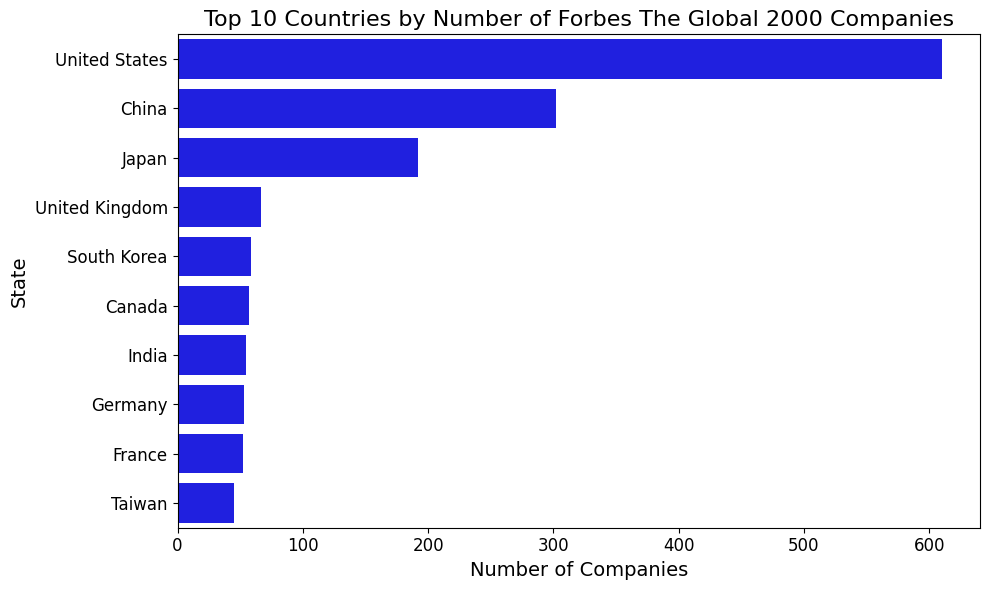

In [ ]:
# The distribution of companies by country
company_counts = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=company_counts.index, x=company_counts.values, color='b')
plt.title('Top 10 Countries by Number of Forbes The Global 2000 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

In [ ]:
df_condence=df.copy()

top_10_countries = df['country'].value_counts().nlargest(10).index
df_condence['country'] = df['country'].apply(lambda x: x if x in top_10_countries else 'others')

4 dimension plotting: bubble plot

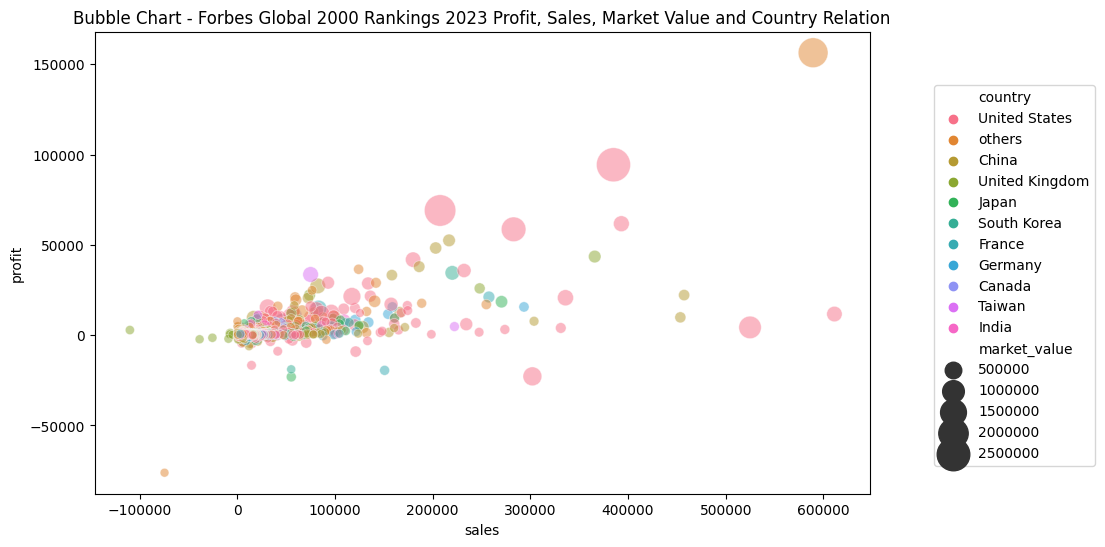

In [ ]:
# Define parameters for the bubble plot
x = 'sales'
y = 'profit'
size = df['market_value']  # Size of the bubbles based on sales
labels = df['company']

# Create the bubble chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condence, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)


# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart - Forbes Global 2000 Rankings 2023 Profit, Sales, Market Value and Country Relation')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart
plt.show()


4.5 dimension plotting: bubble plot with company names as label

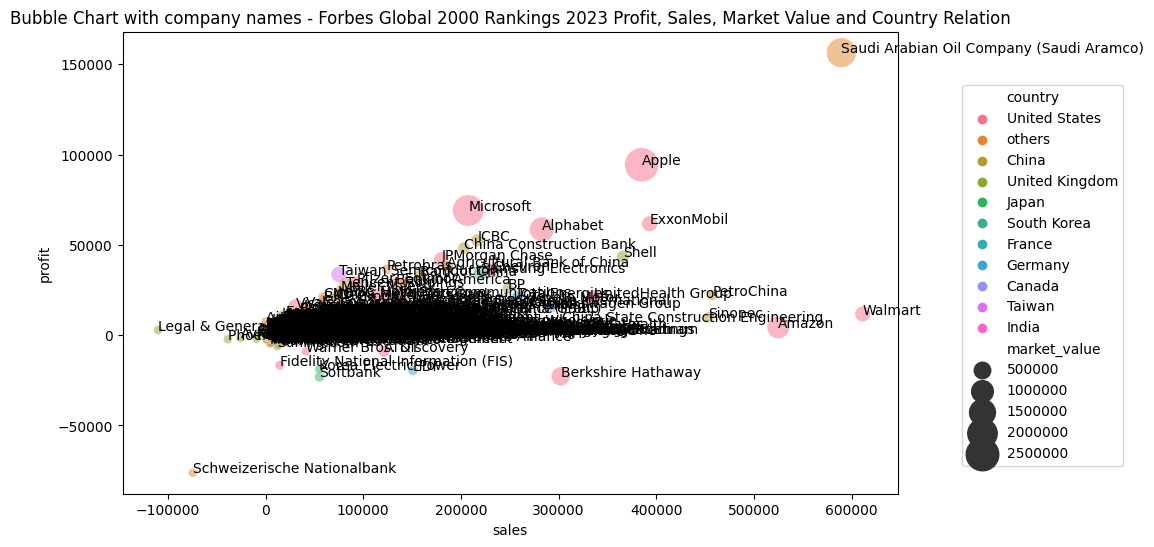

In [ ]:
# Define parameters for the bubble plot
x = 'sales'
y = 'profit'
size = df['market_value']  # Size of the bubbles based on sales
labels = df['company']

# Create the bubble chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condence, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)

# Add labels to the bubbles
for i, txt in enumerate(labels):
    plt.annotate(txt, (df[x].iloc[i], df[y].iloc[i]))

# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart with company names - Forbes Global 2000 Rankings 2023 Profit, Sales, Market Value and Country Relation')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart with company name
plt.show()


**Visualization with and without outliers comparison**

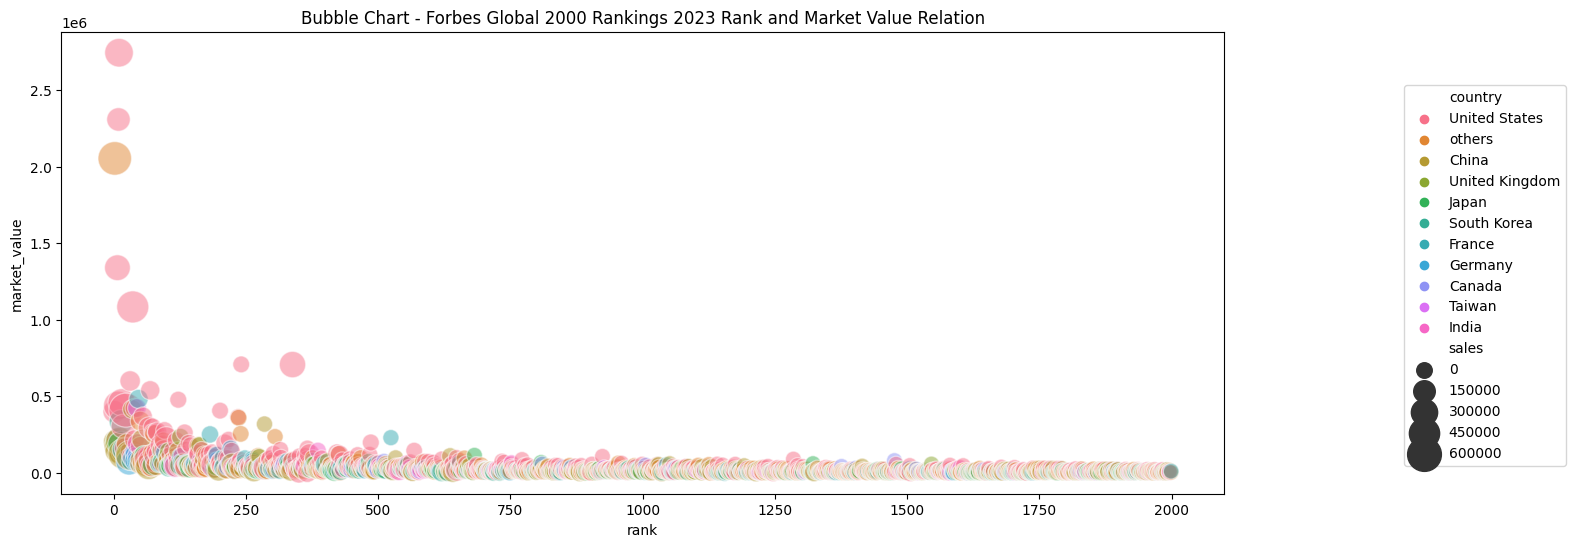

In [ ]:
# Define parameters for the bubble plot
x = 'rank'
y = 'market_value'
size = df['sales']  # Size of the bubbles based on sales
labels = df['company']

# Create the bubble chart using Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_condence, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)

# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart - Forbes Global 2000 Rankings 2023 Rank and Market Value Relation')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart with company name
plt.show()


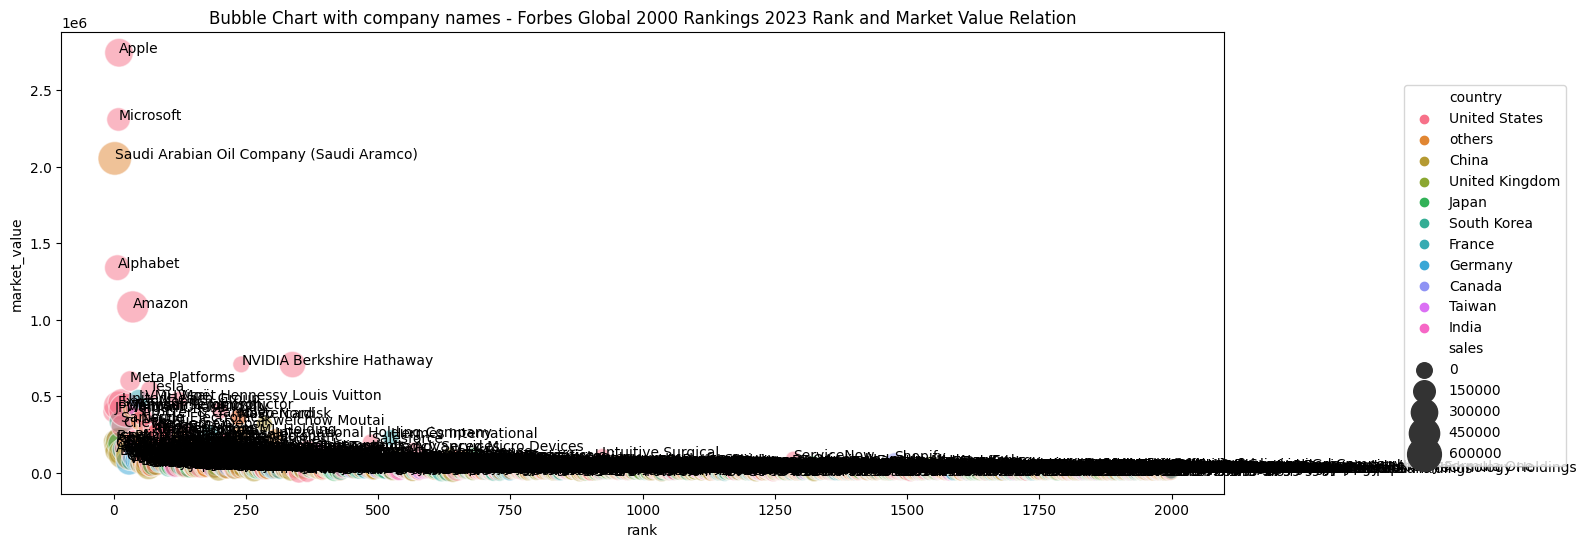

In [ ]:
# Define parameters for the bubble plot
x = 'rank'
y = 'market_value'
size = df['sales']  # Size of the bubbles based on sales
labels = df['company']

# Create the bubble chart using Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_condence, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)

# Add labels to the bubbles
for i, txt in enumerate(labels):
    plt.annotate(txt, (df[x].iloc[i], df[y].iloc[i]))

# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart with company names - Forbes Global 2000 Rankings 2023 Rank and Market Value Relation')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart with company name
plt.show()


From the pair plot we define outliers as companies which have negative profit or negative sales. Moreover, from the plot above company NVIDIA and Berkshire Hathaway as outliers too.

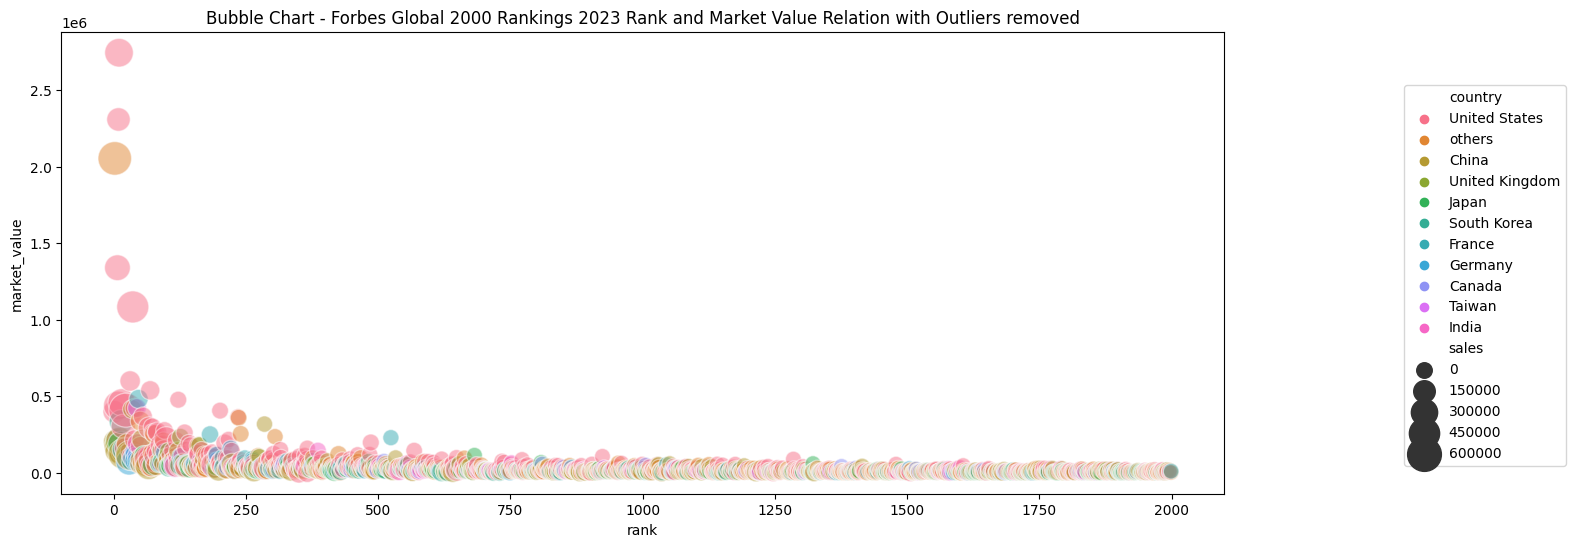

In [ ]:
options = ['NVIDIA', 'Berkshire Hathaway']
df_condence_no_outliers=df_condence.loc[(~df_condence['company'].isin(options)) & (df_condence['profit']>0)  & (df_condence['sales']>0)]

# Define parameters for the bubble plot
x = 'rank'
y = 'market_value'
#size = df_condence_no_outliers['sales']  # Size of the bubbles based on sales



#'Louis Vuitton'

# Create the bubble chart using Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_condence_no_outliers, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)


# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart - Forbes Global 2000 Rankings 2023 Rank and Market Value Relation with Outliers removed')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart with company name
plt.show()

Comparing the Rank and Market Value Relation plot with and without outliers can observe that companies have higher market values tend to have higher rank in the 2023 Forbes Global 2000 Rankings. The market value drops exponentially when the rank goes lower. Actually, the statement above is true for all 4 sales, profit, asset, and market_value parameters showing in the pair plot. The company with higher rank tend to have larger sales, profit, asset, and market_value then other companies. If we want to predict the rank of a company by its sales, profit, asset, and market_value, the simplest way may be using the sum of all 4 parameters after normolizating them, and compare this value with historical data to get a appproximate rank.

**Simpson's paradox check**

From the pairplot a bipolar-distribution is found when considering the "asset" variable. To check the effect of each variable, the 4.5 dimension plotting method is used. The variable which is choose to not show in the  plot is "profit" since its distribution seems to be the most uniform according to the pairplot.

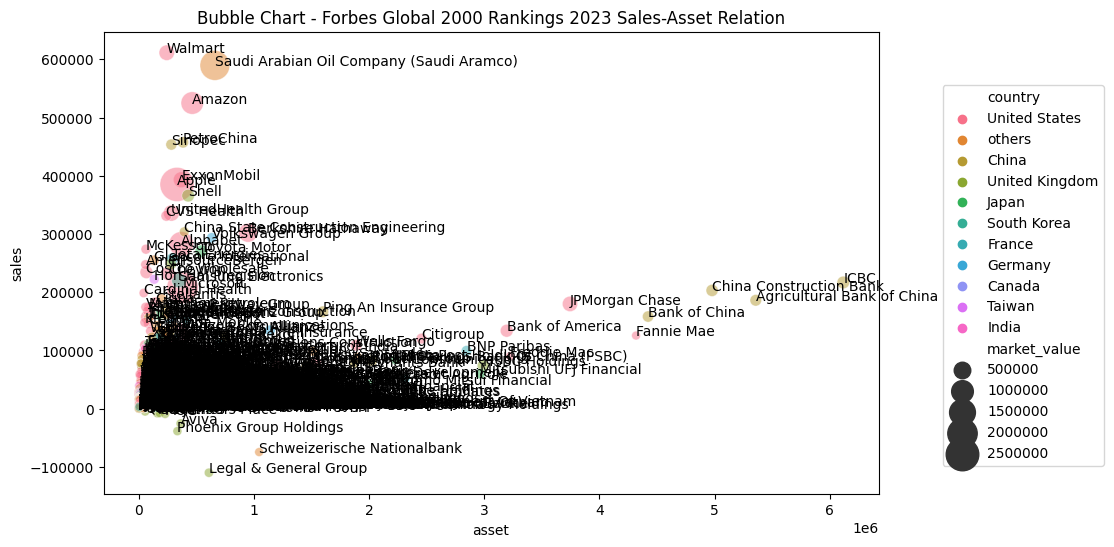

In [ ]:
# Define parameters for the bubble plot
x = 'asset'
y = 'sales'
size = df['market_value']  # Size of the bubbles based on sales
labels = df['company']

# Create the bubble chart using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condence, x=x, y=y,hue="country", size=size, sizes=(40, 600), alpha=0.5)

# Add labels to the bubbles
for i, txt in enumerate(labels):
    plt.annotate(txt, (df[x].iloc[i], df[y].iloc[i]))


# Customize the chart
plt.xlabel(x)
plt.ylabel(y)
plt.title('Bubble Chart - Forbes Global 2000 Rankings 2023 Sales-Asset Relation')
plt.legend(bbox_to_anchor=(1.3, 0.9),loc="upper right")

# Show the chart with company name
plt.show()

As we can see by the company name, financial companies tend to show a different behavior then other companies.The asset-sales relation depends on the company's industry. In order to analyze this part of data, it is better to include the industry of the companies, or at least label if the company is a financial company or not.  

**Discussion and Conclustion**

Most of the companies in the Forbes Global 2000 Rankings 2023 are from United States, China and Japan. From the data visualization we see that companies with higher ranks then to outperform others in all 4 sales, profit, asset, and market value parameters. The contribution of each parameter seems to be uniform since they all grow exponentially when the rank goes higher. That is, normolizing all 4 parameters and summing them up equally may be a powerful index for prediction. From the Sales-Asset Relation plot we find that the financial companies and non-financial companies behave differently. Simpson's paradox may be encountered in the future analysis using current data. For future analysis, a suggestion is to add the industry of the companies in the dataset to avoid potential error.   